In [173]:
import pandas as pd
import numpy as np

In [174]:
#I had to specify "use cols = range(0,6)" as the file had extra columns containing comments.  
#The reason for this seemed to be the use of commas in the comments.

In [175]:
df = pd.read_csv("changes.csv", usecols=range(0,6))

In [176]:
df.head()

,revision,author,date,time,number_of_lines,comment
0,r1551925,Thomas,2015-11-27,16:57:44,1,Renamed folder to the correct name
1,r1551575,Thomas,2015-11-27,09:46:32,1,Removed unused webview.plan.management and web...
2,r1551569,Vincent,2015-11-27,09:38:09,1,enable all clients
3,r1551558,Thomas,2015-11-27,09:13:26,1,Chnaged jira url to htps
4,r1551504,/OU=Domain Control Validated/CN=svn.company.net,2015-11-27,07:05:41,1,[gradle-release] prepare for next development ...


In [177]:
#looking at the first 5 rows of the data and information on the data.  
#I can see date and time are classed as obejcts and not as dates and times.
#I will fix this later in the code

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 6 columns):
revision           422 non-null object
author             422 non-null object
date               422 non-null object
time               422 non-null object
number_of_lines    422 non-null int64
comment            422 non-null object
dtypes: int64(1), object(5)
memory usage: 19.9+ KB


In [179]:
#looking at the values in the authors column.  
#The Domain Control looks like it will not be useful as it is probably sysetm generated

In [180]:
df['author'].value_counts()

Thomas                                             191
Jimmy                                              152
Vincent                                             26
/OU=Domain Control Validated/CN=svn.company.net     24
ajon0002                                             9
Freddie                                              7
Nicky                                                5
Alan                                                 5
Dave                                                 2
murari.krishnan                                      1
Name: author, dtype: int64

In [181]:
#Converting the date column from text to pandas date time

In [182]:
df['date'] = pd.to_datetime(df['date'])

In [183]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 6 columns):
revision           422 non-null object
author             422 non-null object
date               422 non-null datetime64[ns]
time               422 non-null int64
number_of_lines    422 non-null int64
comment            422 non-null object
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 19.9+ KB


In [185]:
#Setting date as index columns

In [186]:
df.set_index('date', inplace=True)
df.head()

,revision,author,time,number_of_lines,comment
date,,,,,
2015-11-27,r1551925,Thomas,16,1,Renamed folder to the correct name
2015-11-27,r1551575,Thomas,9,1,Removed unused webview.plan.management and web...
2015-11-27,r1551569,Vincent,9,1,enable all clients
2015-11-27,r1551558,Thomas,9,1,Chnaged jira url to htps
2015-11-27,r1551504,/OU=Domain Control Validated/CN=svn.company.net,7,1,[gradle-release] prepare for next development ...


In [187]:
#Changing the name to System

In [188]:
df['author'] = df['author'].replace(to_replace ='/OU=Domain Control Validated/CN=svn.company.net', value = 'System')

In [189]:
#importing some packages to do some graphs on the data

In [190]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns

Text(0.5,1,'Commits by Author')

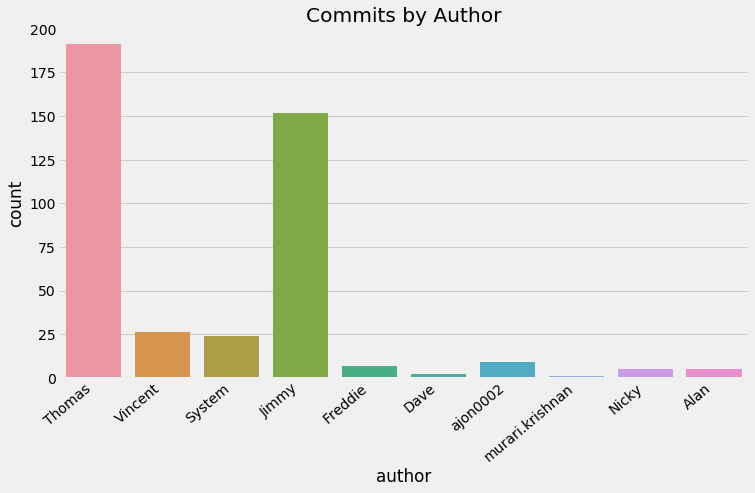

In [191]:
plt.figure(figsize=(11,6))
ax = sns.countplot(x="author", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.countplot(df['author'])
plt.title('Commits by Author')

In [192]:
#Graph shows the unmber of comits made by each author

In [193]:
#Creating a copy called trends ofthe data frame to do some further analysis

In [194]:
trends = df.copy()

In [195]:
trends.head()

,revision,author,time,number_of_lines,comment
date,,,,,
2015-11-27,r1551925,Thomas,16,1,Renamed folder to the correct name
2015-11-27,r1551575,Thomas,9,1,Removed unused webview.plan.management and web...
2015-11-27,r1551569,Vincent,9,1,enable all clients
2015-11-27,r1551558,Thomas,9,1,Chnaged jira url to htps
2015-11-27,r1551504,System,7,1,[gradle-release] prepare for next development ...


In [196]:
#trends.set_index(pd.to_datetime(trends.index), drop=True, inplace=True)
#the below code creates a new weekday column and assigns the dates to a weekday

In [197]:
trends['weekday'] = trends.index.map(lambda x: x.weekday)

In [198]:
#the below shows the number of commits made by day of the week.  Weekday 0 is monday etc.
#So it shows work is only being done monday - friday which is to be expected

In [199]:
trends.groupby('weekday').count()

,revision,author,time,number_of_lines,comment
weekday,,,,,
0,53,53,53,53,53
1,80,80,80,80,80
2,76,76,76,76,76
3,118,118,118,118,118
4,95,95,95,95,95


In [200]:
#importing the names for the weekdays to make the subsequent graph easier to understand

In [201]:
import calendar
list(calendar.day_name)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

Text(0.5,1,'Number of commits by day')

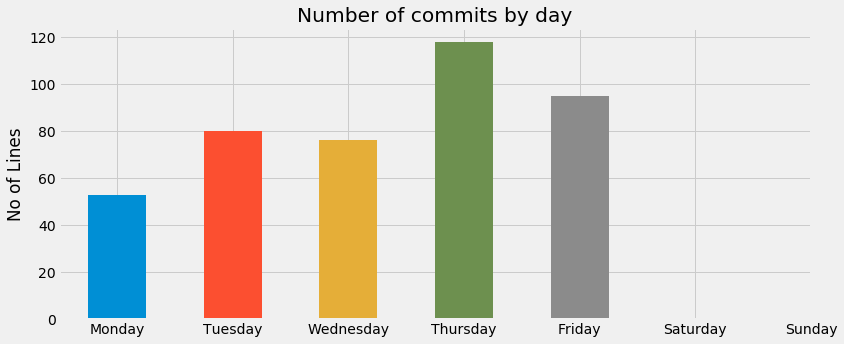

In [202]:
trends.groupby('weekday').count()['number_of_lines'].plot(kind='bar', figsize=(12,5));
plt.xticks(list(range(7)), list(calendar.day_name), rotation='horizontal');
plt.xlabel('')
plt.ylabel('No of Lines')
plt.title('Number of commits by day')

In [203]:
#the below shows how many commits the authors are making on each day

In [204]:
grouped = trends.groupby(['weekday', 'author']).count()
grouped

revision  time  number_of_lines  comment
weekday author                                                   
0       Alan                    1     1                1        1
        Freddie                 2     2                2        2
        Jimmy                  18    18               18       18
        Nicky                   1     1                1        1
        System                  3     3                3        3
        Thomas                 18    18               18       18
        Vincent                 1     1                1        1
        ajon0002                9     9                9        9
1       Jimmy                  34    34               34       34
        Nicky                   1     1                1        1
        System                  2     2                2        2
        Thomas                 37    37               37       37
        Vincent                 6     6                6        6
2       Alan                    1     1                1        1
        Freddie                 2     2                2        2
        Jimmy                  28    28               28       28
        Nicky                   1     1                1        1
        System                  4     4                4        4
        Thomas                 35    35               35       35
        Vincent                 5     5                5        5
3       Alan                    3     3                3        3
        Dave                    2     2                2        2
        Freddie                 2     2                2        2
        Jimmy                  41    41               41       41
        Nicky                   2     2                2        2
        System                 10    10               10       10
        Thomas                 46    46               46       46
        Vincent                11    11               11       11
        murari.krishnan         1     1                1        1
4       Freddie                 1     1                1        1
        Jimmy                  31    31               31       31
        System                  5     5                5        5
        Thomas                 55    55               55       55
        Vincent                 3     3                3        3

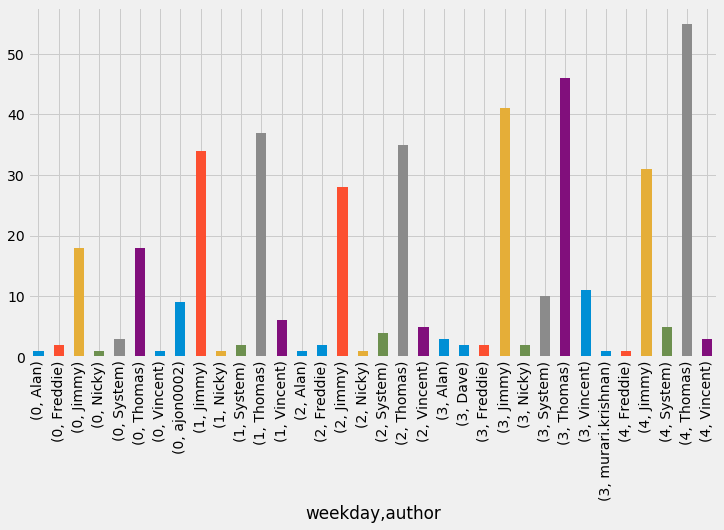

In [205]:
plt.figure(figsize=(11,6))
plt.xticks(list(range(7)), list(calendar.day_name), rotation='horizontal');
grouped['number_of_lines'].plot(kind='bar');

In [206]:
#The above diagram showsus the the commits increase as the week progresses

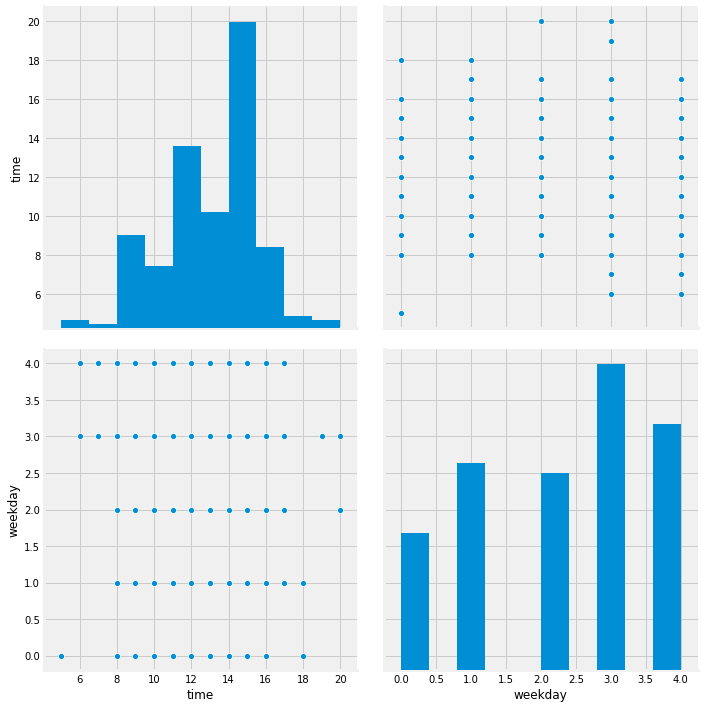

In [207]:
%matplotlib inline
import seaborn as sns
cols = ['time', 'weekday']
sns.pairplot(x_vars=cols, y_vars=cols, data=trends, height=5);
